<a href="https://colab.research.google.com/github/docdecoder/javainfant/blob/master/Alzeimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np

print('numpy: %s' % np.__version__)
# matplotlib
import matplotlib as plt
print('matplotlib: %s' % plt.__version__)
# pandas
import pandas as pd
print('pandas: %s' % pd.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn as sk
print('sklearn: %s' % sk.__version__)



scipy: 1.13.1
numpy: 1.25.2
matplotlib: 3.7.1
pandas: 2.0.3
statsmodels: 0.14.2
sklearn: 1.3.2


In [3]:
data = pd.read_csv('alzheimers_disease_data.csv')
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
#!jupyter nbconvert --to script python_ML.ipynb
     # This will create a python_ML.py file

In [ ]:
# Import the converted file
#import python_ML

     # Now you can access functions or variables from python_ML.py
#python_ML.some_function()

In [ ]:
#%run python_ML.ipynb

In [4]:
data.dtypes
import matplotlib.pyplot as plt


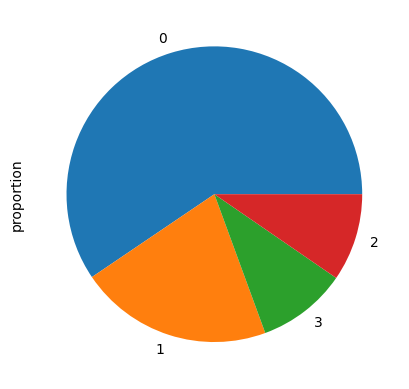

Ethnicity
0    0.594695
1    0.211261
3    0.098185
2    0.095859
Name: proportion, dtype: float64

In [5]:
target = data.Ethnicity.value_counts(normalize=True)
target.plot(kind='pie')
plt.show()
target

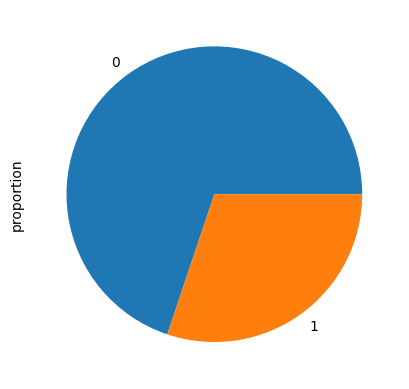

Forgetfulness
0    0.698464
1    0.301536
Name: proportion, dtype: float64

In [6]:
target = data.Forgetfulness.value_counts(normalize=True)
target.plot(kind='pie')
plt.show()
target

In [7]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns # imports seaborn and renames it to sns


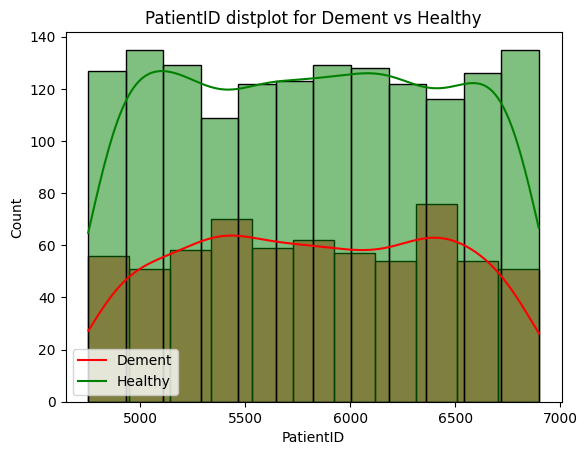

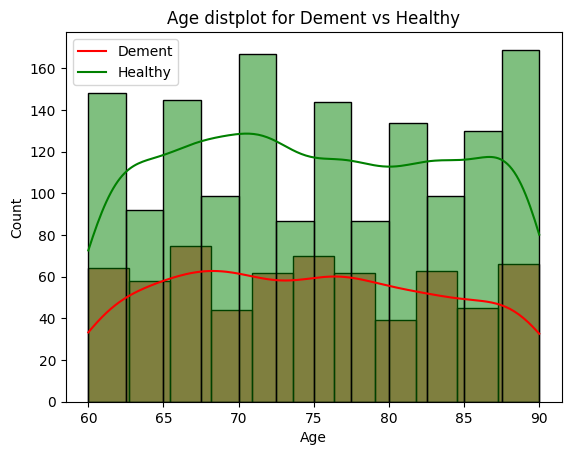

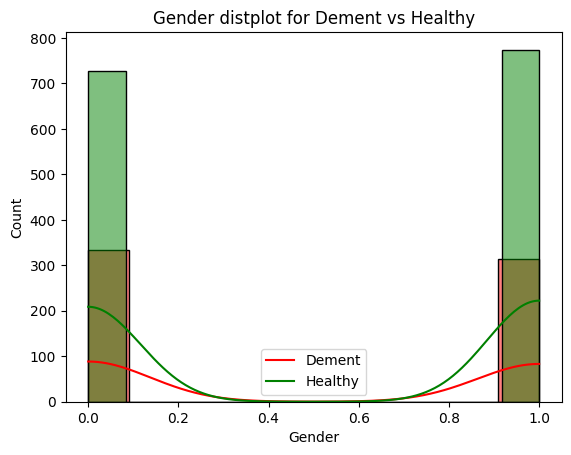

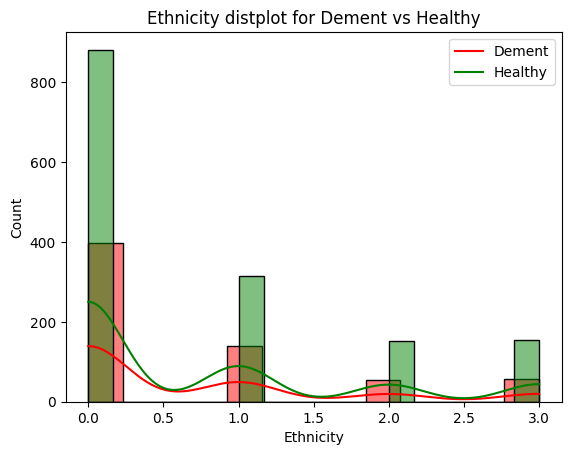

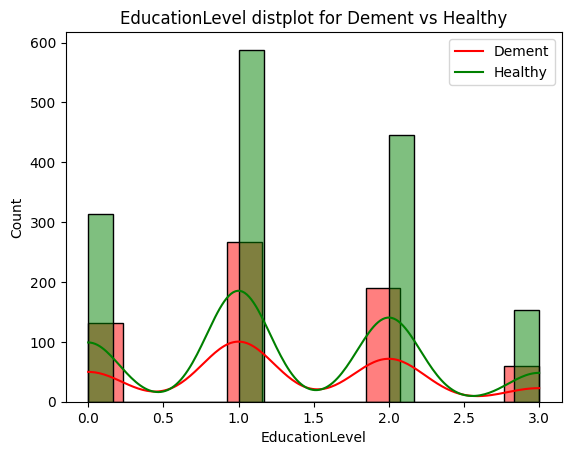

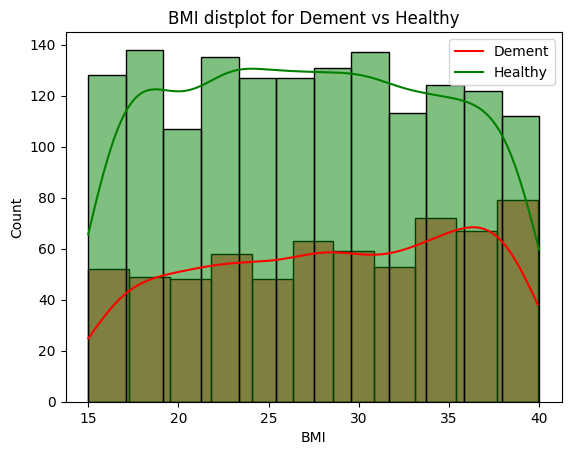

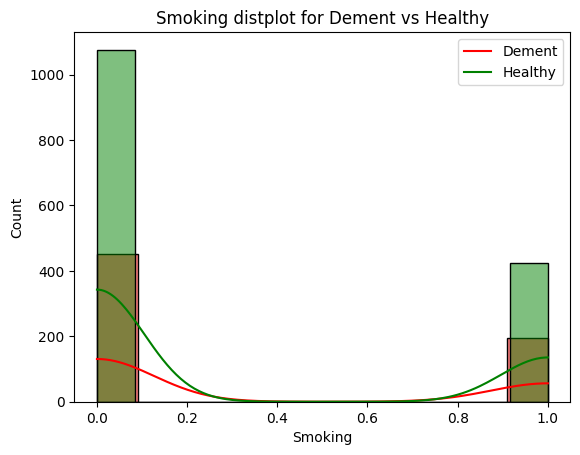

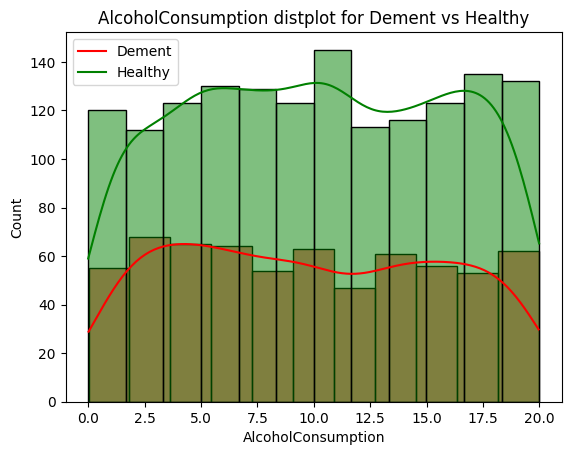

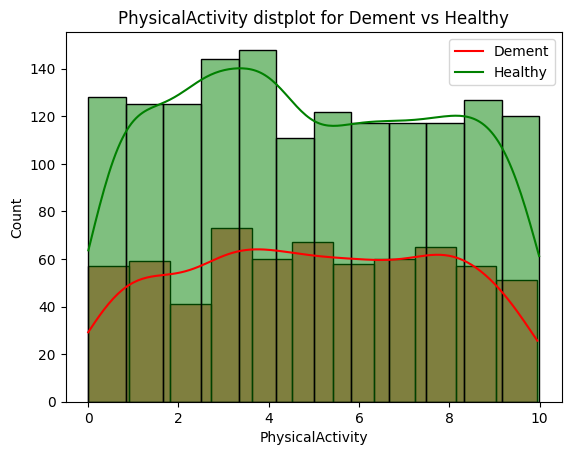

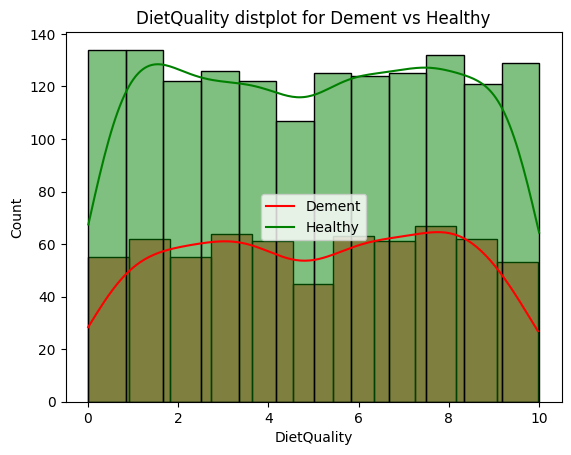

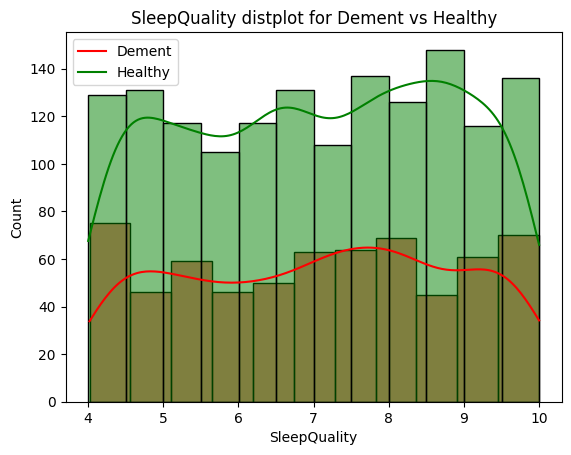

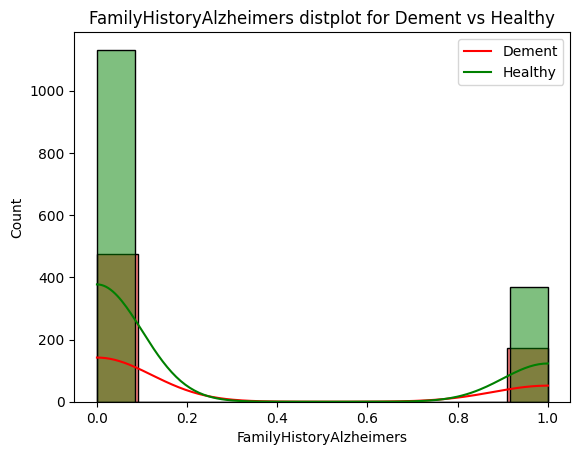

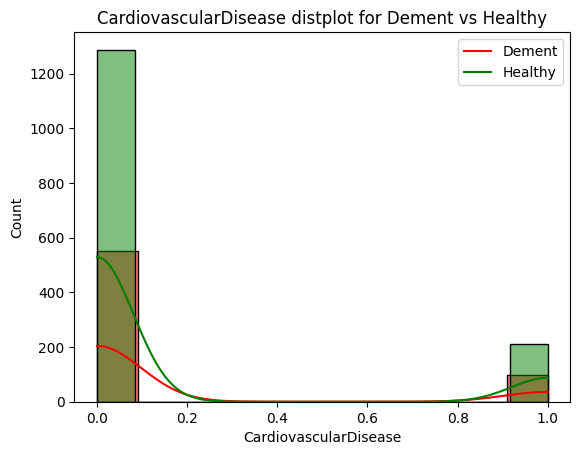

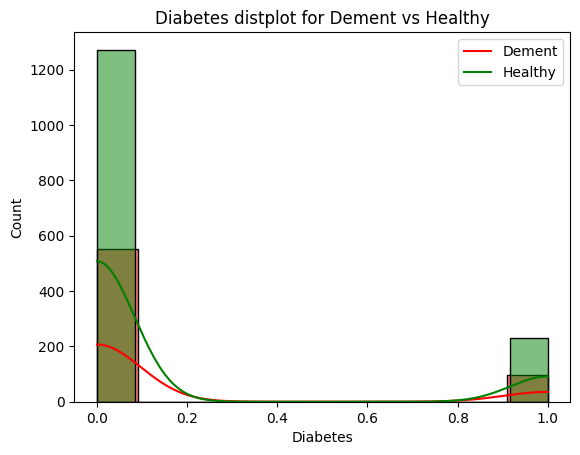

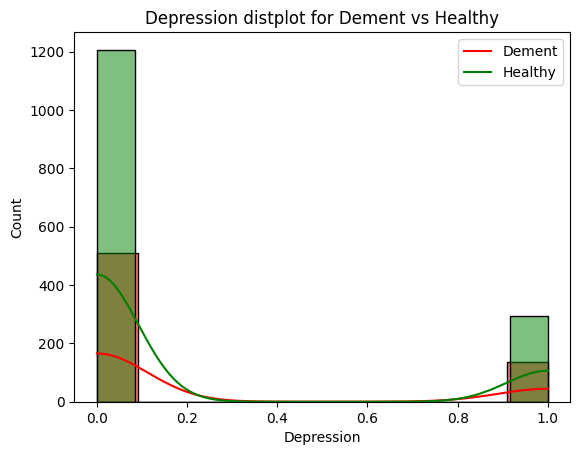

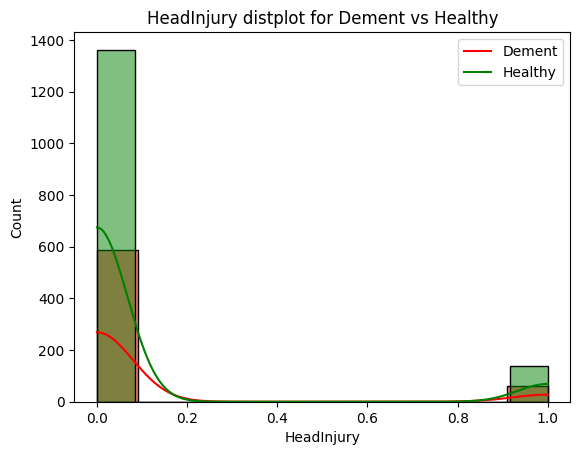

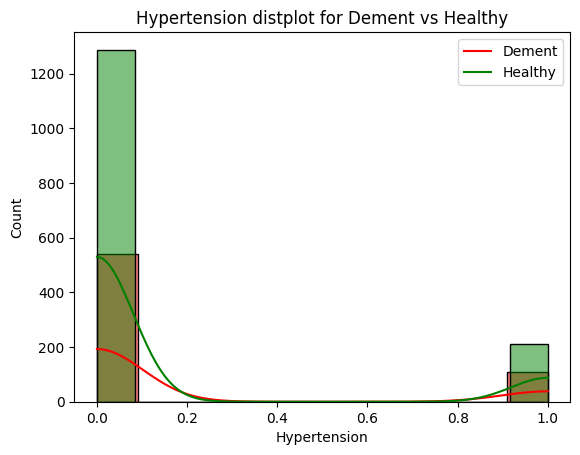

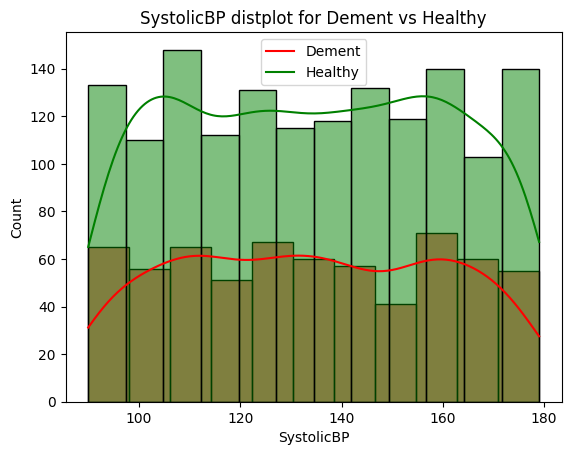

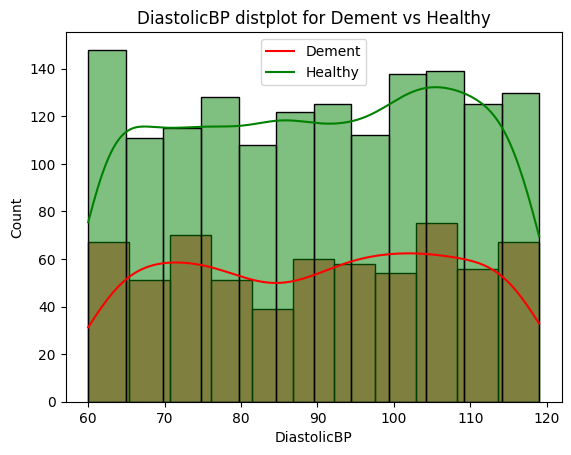

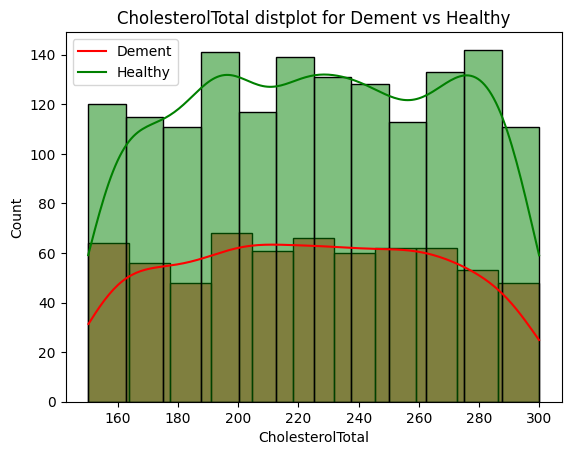

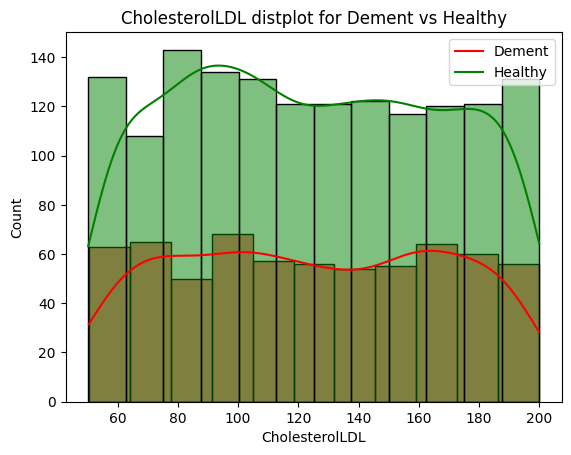

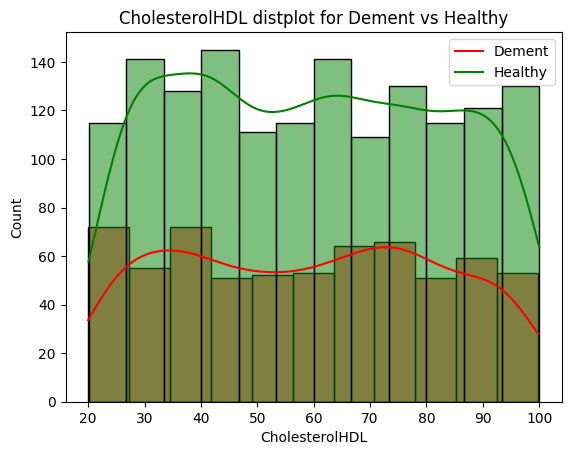

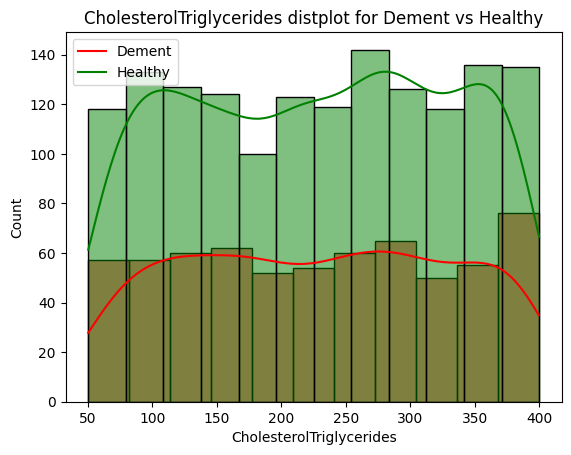

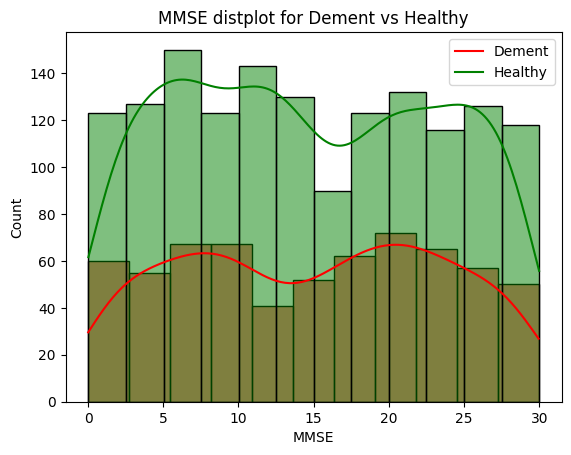

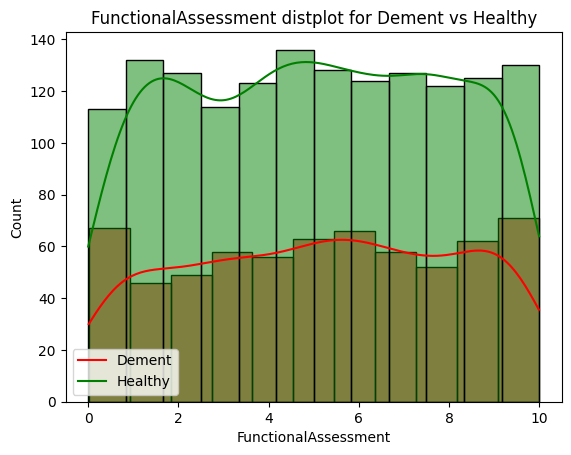

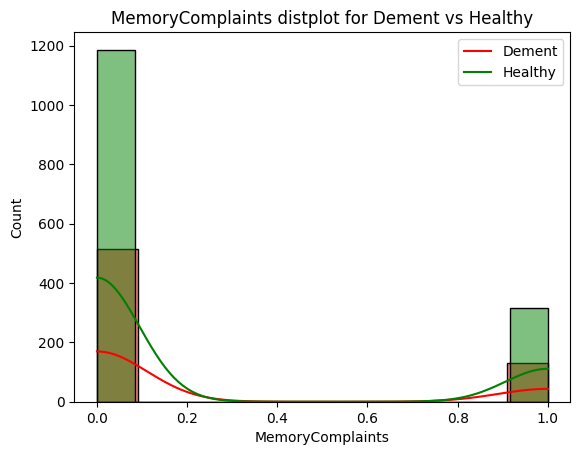

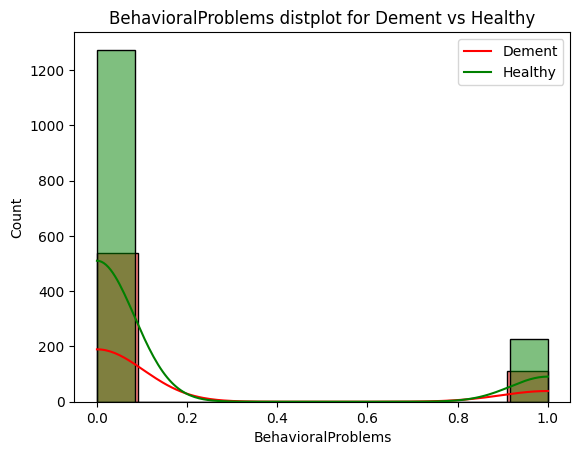

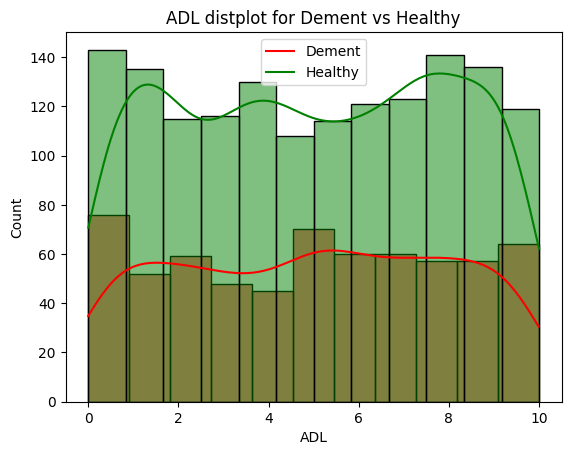

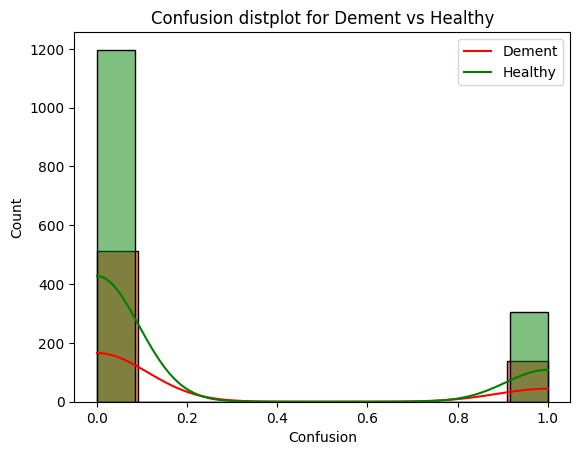

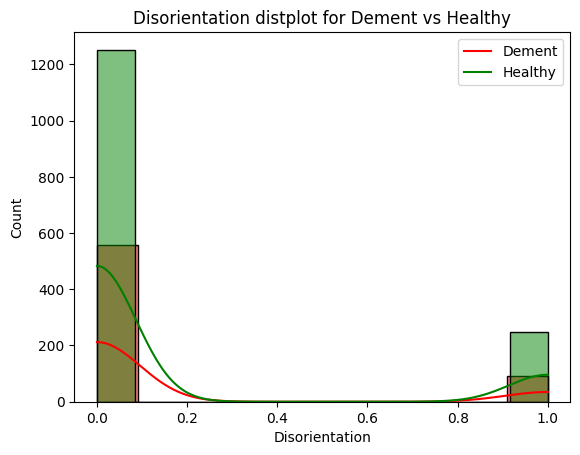

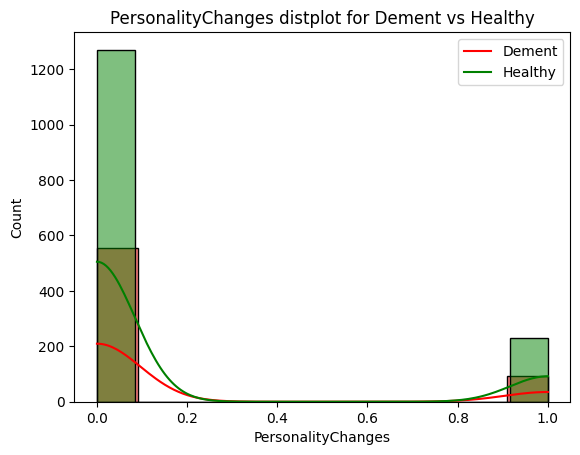

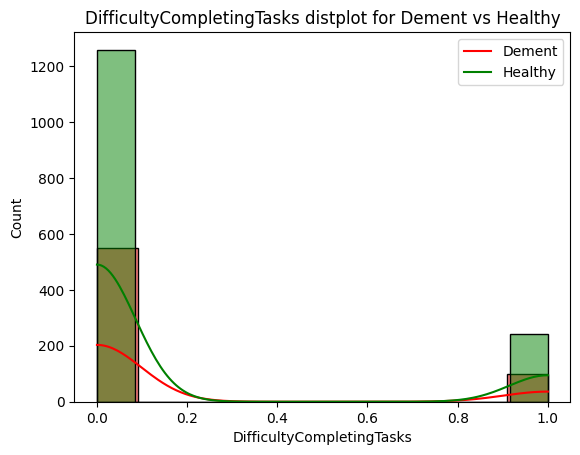

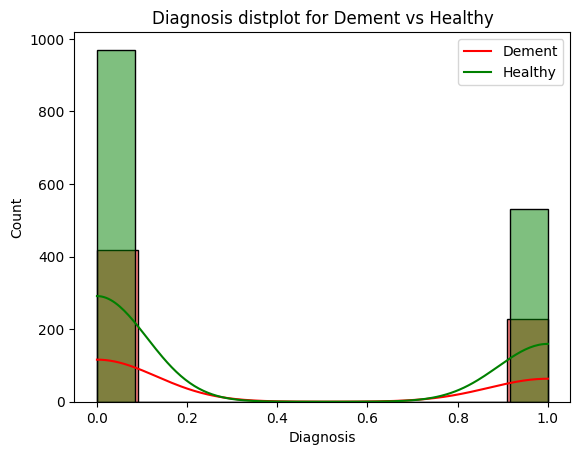

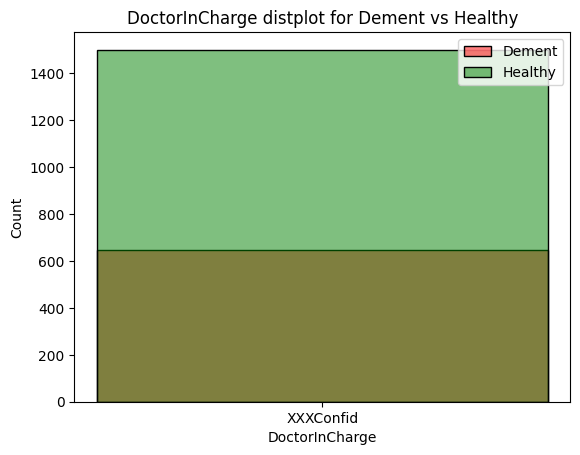

In [9]:
def compare_dist_by_target(features):
    for feature in features:
        dement = data.loc[data['Forgetfulness'] == 1][feature]
        healthy = data.loc[data['Forgetfulness'] == 0][feature]

        sns.histplot(dement, color='red', kde=True)
        sns.histplot(healthy, color='green', kde=True)
        plt.title(f'{feature} distplot for Dement vs Healthy')
        plt.legend(['Dement', 'Healthy'])
        plt.show()

features = data.columns.to_list()
features.remove('Forgetfulness')
compare_dist_by_target(features)

In [15]:
#data.isna().sum()
data.isnull().sum()
data.columns


Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [16]:
# Find median based on target class
tmp = data.copy()
for feature in features:
  if pd.api.types.is_numeric_dtype(tmp[feature]): # Check if the column is numeric
    tmp[feature] = tmp[feature].replace(0, np.nan)
    tmp = tmp[tmp.notnull()]
    print(pd.DataFrame(tmp.groupby('Forgetfulness')[feature].median()))
  else:
    print(f"Skipping non-numeric feature: {feature}") # Print a message for skipped columns

               PatientID
Forgetfulness           
0                 5830.0
1                 5808.0
                Age
Forgetfulness      
0              75.0
1              75.0
               Gender
Forgetfulness        
0                 1.0
1                 1.0
               Ethnicity
Forgetfulness           
0                    1.0
1                    1.0
               EducationLevel
Forgetfulness                
0                         2.0
1                         1.0
                     BMI
Forgetfulness           
0              27.251594
1              28.705859
               Smoking
Forgetfulness         
0                  1.0
1                  1.0
               AlcoholConsumption
Forgetfulness                    
0                       10.152167
1                        9.645827
               PhysicalActivity
Forgetfulness                  
0                      4.679626
1                      4.988145
               DietQuality
Forgetfulness             
0 

In [17]:
# Replace missing values
# Impute missing values in Glucose feature
feat = 'CholesterolTotal'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 107.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 140.0

# Impute missing values in SkinThickness feature
feat = 'HeadInjury'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in BloodPressure feature
feat = 'Hypertension'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 70.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 74.0

# Impute missing values in SkinThickness feature
feat = 'Smoking'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in Insulin feature
feat = 'Diabetes'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 102.5
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 169.5

# Impute missing values in BMI feature
feat = 'BMI'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 30.1
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 34.3

# Impute missing values in SkinThickness feature
feat = 'EducationLevel'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in SkinThickness feature
feat = 'PhysicalActivity'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in SkinThickness feature
feat = 'DietQuality'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in SkinThickness feature
feat = 'SleepQuality'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in SkinThickness feature
feat = 'Age'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in SkinThickness feature
feat = 'Gender'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

# Impute missing values in SkinThickness feature
feat = 'Ethnicity'
data[feat] = data[feat].replace(0, np.nan)
data.loc[(data['Forgetfulness'] == 0) & data[feat].isnull(), feat] = 27.0
data.loc[(data['Forgetfulness'] == 1) & data[feat].isnull(), feat] = 32.0

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,27.0,27.0,2.0,22.927749,27.0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,32.0,32.0,32.0,26.827681,32.0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,27.0,3.0,1.0,17.795882,27.0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1.0,27.0,1.0,33.800817,1.0,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,27.0,27.0,27.0,20.716974,27.0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


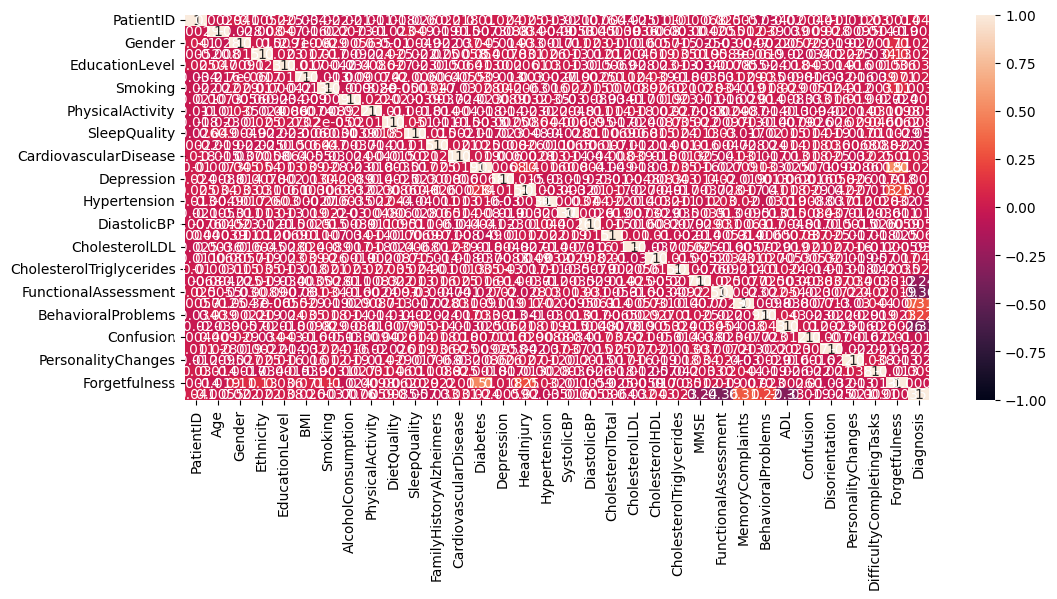

In [18]:
# Look at correlation matrix
plt.figure(figsize = (12,5))

# Exclude non-numeric columns from the correlation matrix
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

In [20]:

# Import the necessary module
!pip install scikit-learn
from sklearn.model_selection import StratifiedShuffleSplit


# Build a baseline logistic regression model

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
train_index, test_index = next(sss.split(data.drop('Forgetfulness', axis=1), data['Forgetfulness']))

X_train = data.loc[train_index,].drop('Forgetfulness', axis=1)
X_train['DoctorInCharge'] = X_train['DoctorInCharge'].replace('XXXConfid', 1) # Replace with appropriate numerical value

y_train = data.loc[train_index]['Forgetfulness']

X_test = data.loc[test_index,].drop('Forgetfulness', axis=1)
X_test['DoctorInCharge'] = X_test['DoctorInCharge'].replace('XXXConfid', 1) # Replace with appropriate numerical value

y_test = data.loc[test_index]['Forgetfulness']

In [21]:
model_performance_data = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': [], 'Threshold': []}

In [22]:
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

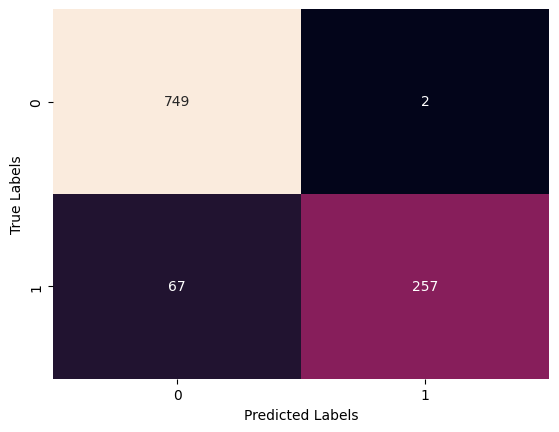

Precision: 0.99, Recall: 0.79, F1 Score: 0.8816466552315609 Accuracy: 0.94


In [23]:
# Ensure the correct value is being replaced and the changes are being applied to the DataFrame


lr_model = Pipeline([
    ('transformer', PowerTransformer()),
    ('standard_scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=500, C=100))
])
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt=".0f", cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()


pr_score = precision_score(y_true=y_test, y_pred=y_pred)
rc_score = recall_score(y_true=y_test, y_pred=y_pred)
ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print(f'Precision: {pr_score:.2f}, Recall: {rc_score:.2f}, F1 Score: {f1} Accuracy: {ac_score:.2f}')

In [24]:
y_test.value_counts()

Forgetfulness
0    751
1    324
Name: count, dtype: int64

In [25]:
pd.Series(y_pred).value_counts()

0    816
1    259
Name: count, dtype: int64

In [26]:
len(y_test)

1075

In [27]:
pd.DataFrame({'Actual':y_test,'Pred':y_pred})

,Actual,Pred
1872,1,1
1802,1,1
243,1,1
35,0,0
1989,0,0
...,...,...
1194,0,0
1868,1,1
1512,0,0
2139,0,0
